In [7]:
!pip install google-cloud-bigquery pandas seaborn scikit-learn scipy matplotlib

from google.cloud import bigquery
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt 


In [8]:
# Initialize BigQuery client
client = bigquery.Client(project='refined-lotus-456900-t8')

# Query data directly from BigQuery
query = """
SELECT
  Gene,
  P_day0,
  P_day1,
  P_day2,
  P_day4,
  P_day8,
  P_day12
FROM `refined-lotus-456900-t8.data_4a.proteomic_data`
"""

df = client.query(query).to_dataframe().set_index('Gene')



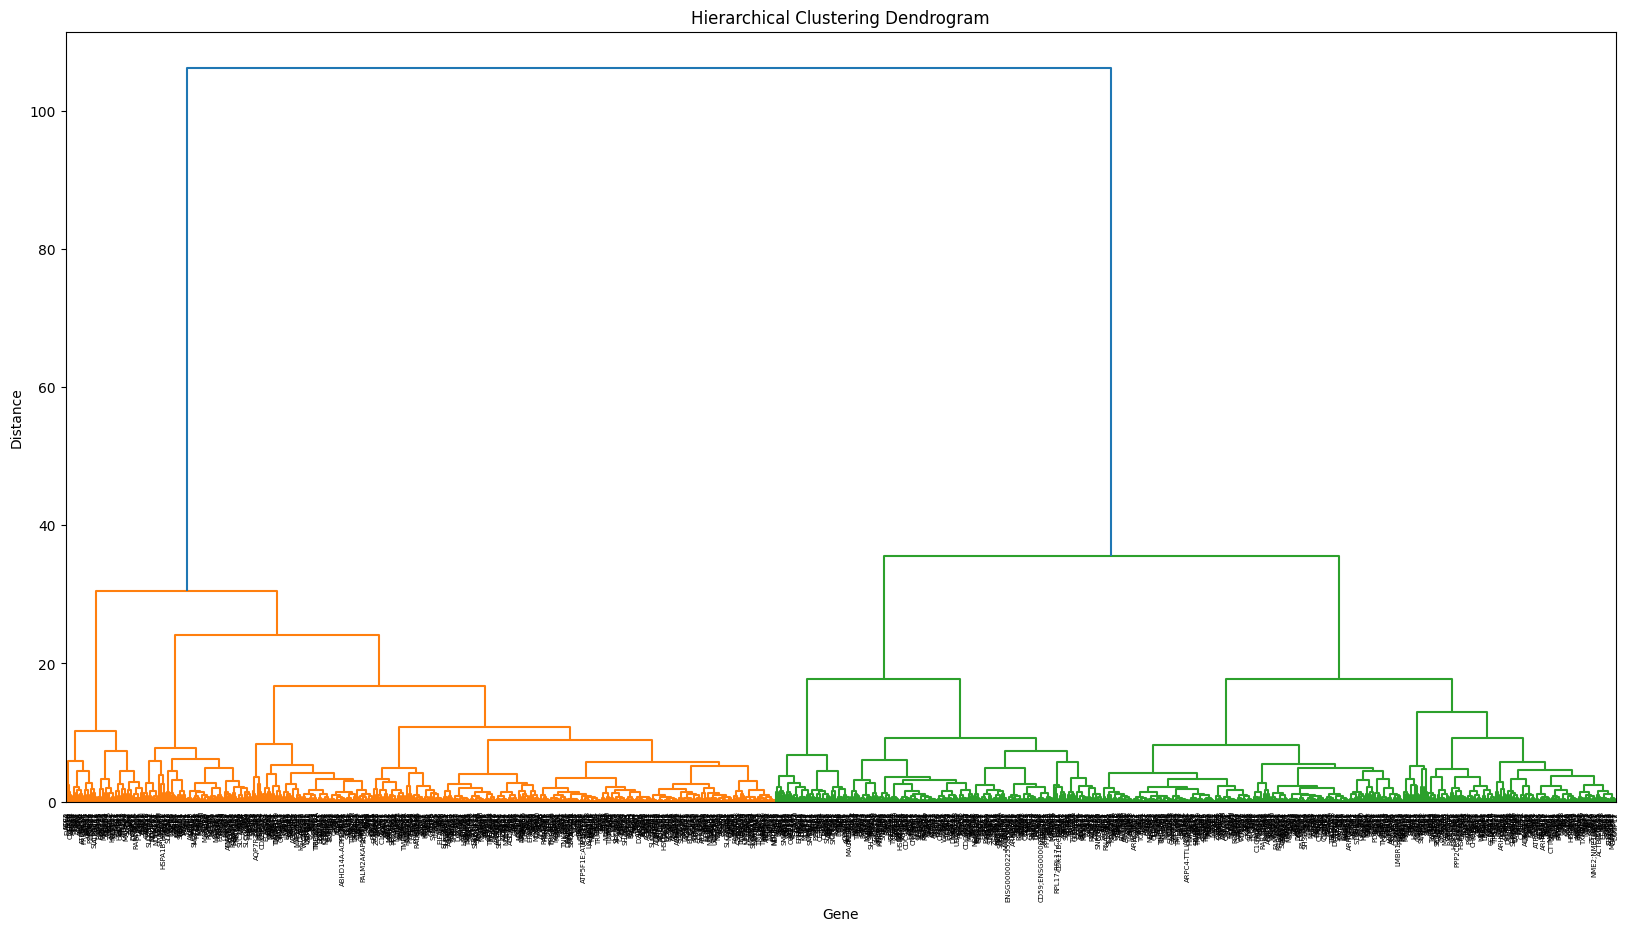

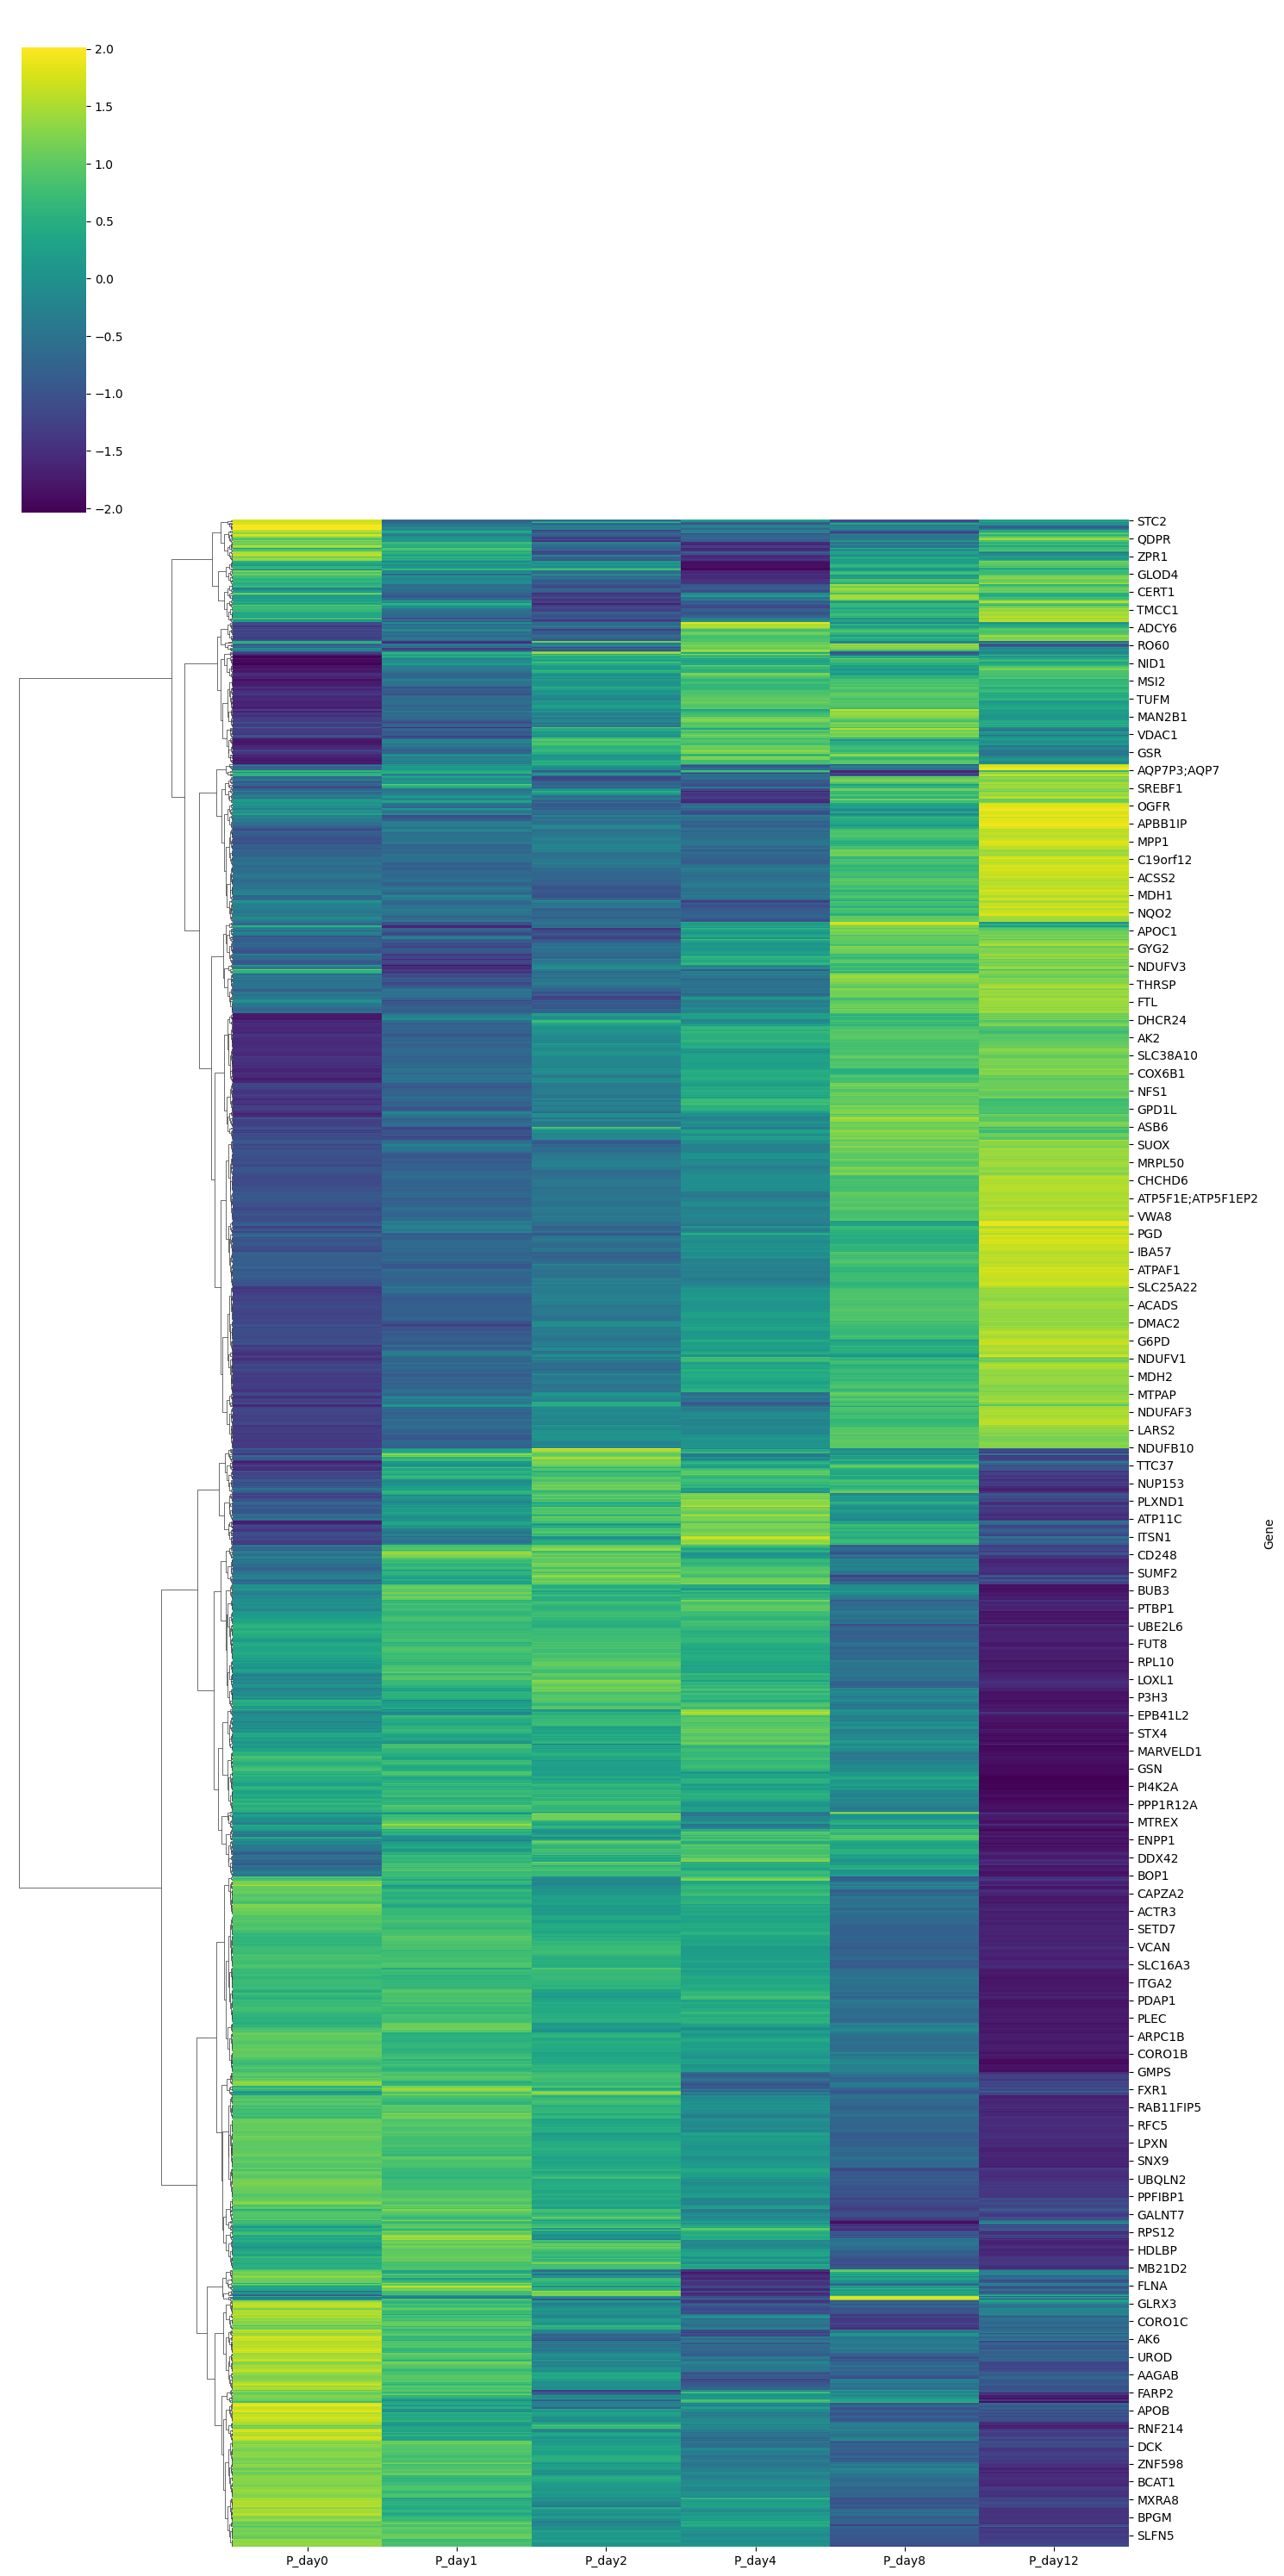

In [11]:
# Compute hierarchical clustering
row_linkage = linkage(df, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(row_linkage, labels=df.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Gene')
plt.ylabel('Distance')
plt.savefig('heirarchical_clustering')

# Generate clustered heatmap
sns.clustermap(
  df,
  row_linkage=row_linkage,
  col_cluster=False,
  cmap='viridis',
  figsize=(15, 30)
)

# Save the heatmap locally or to GCS if needed
plt.savefig('heatmap.png')